#### Kindly see and update me. I am just preparing a sample to know either I am on the right track or not. I'll add everything you demanded. Please inform me about the work done so far

# Imports

We need to import following modules to implement required functionality

In [1]:
from sklearn.naive_bayes import GaussianNB
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
import seaborn as sns
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix, log_loss
import tools as t
%matplotlib inline

### Reading data from files

In [2]:
 
column_names = ['term_id','doc_id', 'counts', 'class']

mtx_data = pd.read_csv( "./dataset/mtx.mtx", sep="\s+", names=column_names)
data_array = np.asarray(mtx_data[mtx_data.columns])

classes_data  = pd.read_csv( "./dataset/classes.txt",sep="\s+", names=['doc_id', 'class_id'] )
classes_array = np.asarray( classes_data[classes_data.columns])


In [3]:
indx = np.isnan(data_array)
data_array[indx] = 0

for i in range(classes_array.shape[0]):
    indz = data_array[:,1]==classes_array[i,0]
    data_array[indz, 3] = classes_array[i,1]

print data_array
    


[[  1.00000000e+00   1.00000000e+00   1.00000000e+00   0.00000000e+00]
 [  1.00000000e+00   7.00000000e+00   2.00000000e+00   0.00000000e+00]
 [  1.00000000e+00   1.10000000e+01   1.00000000e+00   0.00000000e+00]
 ..., 
 [  9.63500000e+03   2.18400000e+03   1.00000000e+00   4.00000000e+00]
 [  9.63500000e+03   2.18600000e+03   1.00000000e+00   4.00000000e+00]
 [  9.63500000e+03   2.21800000e+03   1.00000000e+00   4.00000000e+00]]


### Lets Plot the data

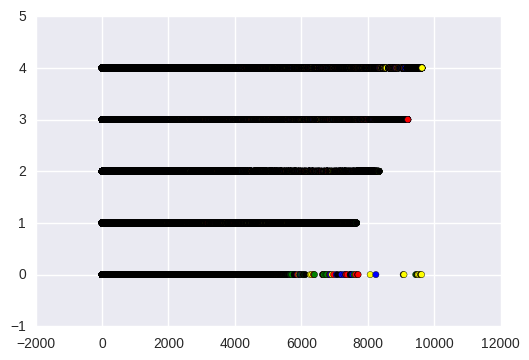

In [4]:

#Lets plot the Complete data, 
# Remember seeing is believing
colors = ['red', 'green', 'blue', 'yellow', 'black']
plt.scatter(data_array[:,0], data_array[:,3], c=colors )
#plt.show()

## Naive Bayes Algorithm

In [5]:

Xtrain, Xtest, ytrain, ytest = train_test_split(data_array[:,[0,1,2]],data_array[:,3],
                                                 random_state=10)
#Create a Gaussian Classifier
gb = GaussianNB()

# Train the model using the training sets 
gb.fit(Xtrain, ytrain)

#Predict Output 
ypredicted= gb.predict(Xtest)

#Calculating Mean Absolute Error 
mae = mean_absolute_error(ytest, ypredicted)

print "Accuracy = ", np.sum(ypredicted==ytest)/float(ytest.shape[0])
print "Mean Absolute Error:",mae
print "-------  Confusion Matrix -------"
t.print_confusion_matrix(ypredicted.ravel(),ytest.ravel())


Accuracy =  0.958769213602
Mean Absolute Error: 0.047549306776
-------  Confusion Matrix -------


Predicted,0.0,1.0,2.0,3.0,4.0,All
Actual,,,,,,
0.0,14751,260,0,0,151,15162
1.0,1419,9670,100,0,0,11189
2.0,0,136,14820,183,0,15139
3.0,0,0,412,14127,164,14703
4.0,0,0,0,131,15370,15501
All,16170,10066,15332,14441,15685,71694


## Decision Tree Classifier

In [6]:
from sklearn import tree

#Creating Decision Tree Classifier
clf = tree.DecisionTreeClassifier()

#Train the Model using dataset
clf.fit(Xtrain, ytrain)

#Predict the output
yfit = clf.predict(Xtest)

# Calculating Error in predictions
mae = mean_absolute_error(ytest, yfit)

print "Accuracy = ", np.sum(yfit==ytest)/float(ytest.shape[0])
print "Mean Absolute Error:",mae
print "-------  Confusion Matrix -------"
t.print_confusion_matrix(yfit.ravel(),ytest.ravel())


Accuracy =  1.0
Mean Absolute Error: 0.0
-------  Confusion Matrix -------


Predicted,0.0,1.0,2.0,3.0,4.0,All
Actual,,,,,,
0.0,15162,0,0,0,0,15162
1.0,0,11189,0,0,0,11189
2.0,0,0,15139,0,0,15139
3.0,0,0,0,14703,0,14703
4.0,0,0,0,0,15501,15501
All,15162,11189,15139,14703,15501,71694


## K Neighbors Classifier

In [7]:
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=3)


neigh.fit(Xtrain, ytrain)


ypredict = neigh.predict(Xtest)

#Evaluating the Error in predictions
mae =mean_absolute_error(ytest, ypredict)

print "Accuracy = ", np.sum(ypredict==ytest)/float(ytest.shape[0])
print "Mean Absolute Error:",mae
print "-------  Confusion Matrix -------"
t.print_confusion_matrix(ypredict.ravel(),ytest.ravel())


Accuracy =  0.994113872848
Mean Absolute Error: 0.0121209585181
-------  Confusion Matrix -------


Predicted,0.0,1.0,2.0,3.0,4.0,All
Actual,,,,,,
0.0,15039,13,0,0,110,15162
1.0,25,11129,35,0,0,11189
2.0,0,34,15088,17,0,15139
3.0,0,0,71,14590,42,14703
4.0,39,0,0,36,15426,15501
All,15103,11176,15194,14643,15578,71694


## Linear SVC Classifier

In [8]:
#Creating Instance of Linear SVC Classifier
lscv = LinearSVC()

#Training the model
lscv.fit(Xtrain, ytrain)

# Testing the model
ypredict = lscv.predict(Xtest)

#Evaluating the Error in predictions
mae =mean_absolute_error(ytest, ypredict)

print "Accuracy = ", np.sum(ypredict==ytest)/float(ytest.shape[0])
print "Mean Absolute Error:",mae
print "-------  Confusion Matrix -------"
t.print_confusion_matrix(ypredict.ravel(),ytest.ravel())

Accuracy =  0.377046893743
Mean Absolute Error: 0.884760230982
-------  Confusion Matrix -------


Predicted,0.0,2.0,All
Actual,,,
0.0,11893,3269,15162
1.0,193,10996,11189
2.0,0,15139,15139
3.0,0,14703,14703
4.0,0,15501,15501
All,12086,59608,71694


## Random Forest Classifier

In [9]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=10, max_depth=8)

#Train the Model using dataset
clf.fit(Xtrain, ytrain)

#Predict the output
yfit = clf.predict(Xtest)

# Calculating Error in predictions
mae = mean_absolute_error(ytest, yfit)

print "Accuracy = ", np.sum(yfit==ytest)/float(ytest.shape[0])
print "Mean Absolute Error:",mae
print "-------  Confusion Matrix -------"
t.print_confusion_matrix(yfit.ravel(),ytest.ravel())


Accuracy =  0.897062515692
Mean Absolute Error: 0.102979328814
-------  Confusion Matrix -------


Predicted,0.0,1.0,2.0,3.0,4.0,All
Actual,,,,,,
0.0,15161,0,0,0,1,15162
1.0,1,3825,7363,0,0,11189
2.0,0,0,15138,1,0,15139
3.0,0,0,13,14689,1,14703
4.0,0,0,0,0,15501,15501
All,15162,3825,22514,14690,15503,71694


## Gradient Boosting Classifier

In [10]:
from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)

#Train the Model using dataset
clf.fit(Xtrain, ytrain)

#Predict the output
yfit = clf.predict(Xtest)

# Calculating Error in predictions
mae = mean_absolute_error(ytest, yfit)

print "Accuracy = ", np.sum(yfit==ytest)/float(ytest.shape[0])
print "Mean Absolute Error:",mae
print "-------  Confusion Matrix -------"
t.print_confusion_matrix(yfit.ravel(),ytest.ravel())


Accuracy =  1.0
Mean Absolute Error: 0.0
-------  Confusion Matrix -------


Predicted,0.0,1.0,2.0,3.0,4.0,All
Actual,,,,,,
0.0,15162,0,0,0,0,15162
1.0,0,11189,0,0,0,11189
2.0,0,0,15139,0,0,15139
3.0,0,0,0,14703,0,14703
4.0,0,0,0,0,15501,15501
All,15162,11189,15139,14703,15501,71694


## Ada Boost Classifier

In [11]:
from sklearn.ensemble import AdaBoostClassifier

clf = AdaBoostClassifier()

#Train the Model using dataset
clf.fit(Xtrain, ytrain)

#Predict the output
yfit = clf.predict(Xtest)

# Calculating Error in predictions
mae = mean_absolute_error(ytest, yfit)

print "Accuracy = ", np.sum(yfit==ytest)/float(ytest.shape[0])
print "Mean Absolute Error:",mae
print "-------  Confusion Matrix -------"
t.print_confusion_matrix(yfit.ravel(),ytest.ravel())


Accuracy =  0.638854018467
Mean Absolute Error: 0.361145981533
-------  Confusion Matrix -------


Predicted,0.0,2.0,4.0,All
Actual,,,,
0.0,15162,0,0,15162
1.0,0,11189,0,11189
2.0,0,15139,0,15139
3.0,0,14703,0,14703
4.0,0,0,15501,15501
All,15162,41031,15501,71694
